<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
<center>
Автор материала: Юрий Кашницкий, программист-исследователь Mail.Ru Group <br> 

Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание № 1 (демо).<br> Анализ данных по доходу населения UCI Adult</center>

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) (качать данные не надо – они уже есть в репозитории). Для отправки решений используйте [онлайн-форму](https://docs.google.com/forms/d/1xAzU-5N6oEeR4UG8G44V6XL-Kbr4WYcPBG45Kijge2Y).**

Уникальные значения признаков (больше информации по ссылке выше):
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- salary: >50K,<=50K

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('../../data/adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


**1. Сколько мужчин и женщин (признак *sex*) представлено в этом наборе данных?**

In [4]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [4]:
print(data.shape)

(32561, 15)


**2. Каков средний возраст (признак *age*) женщин?**

In [5]:
data[data['sex'] == 'Female']['age'].mean()

36.85823043357163

**3. Какова доля граждан Германии (признак *native-country*)?**

In [6]:
float((data['native-country'] == 'Germany').sum())/data.shape[0]

0.004207487485028101

**4-5. Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак *salary*) и тех, кто получает менее 50K в год? **

In [7]:
data.groupby(['salary'])['age'].describe(percentiles=[])

,count,mean,std,min,50%,max
salary,,,,,,
<=50K,24720.0,36.783738,14.020088,17.0,34.0,90.0
>50K,7841.0,44.249841,10.519028,19.0,44.0,90.0


**6. Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак *education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**

In [8]:
data[data['salary'] == '>50K']['education'].unique()

array(['HS-grad', 'Masters', 'Bachelors', 'Some-college', 'Assoc-voc',
       'Doctorate', 'Prof-school', 'Assoc-acdm', '7th-8th', '12th',
       '10th', '11th', '9th', '5th-6th', '1st-4th'], dtype=object)

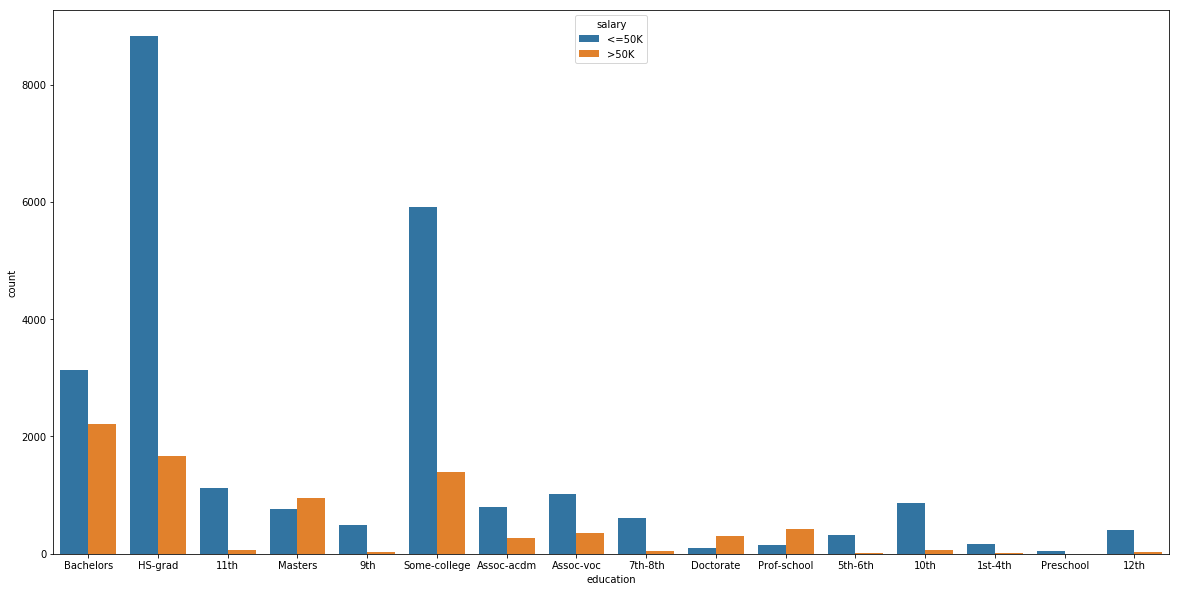

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.countplot(x='education', hue='salary', data = data);

**7. Выведите статистику возраста для каждой расы (признак *race*) и каждого пола. Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин расы *Amer-Indian-Eskimo*.**

In [9]:
data[(data['sex'] == 'Male') & (data['race'] == 'Amer-Indian-Eskimo')]['age'].max()


82

In [10]:
for (race, sex), sub_df in pd.groupby(data, ['race', 'sex']):
    print("Race: {0}, Sex: {1}".format(race, sex))
    print(sub_df['age'].describe())

Race: Amer-Indian-Eskimo, Sex: Female
count    119.000000
mean      37.117647
std       13.114991
min       17.000000
25%       27.000000
50%       36.000000
75%       46.000000
max       80.000000
Name: age, dtype: float64
Race: Amer-Indian-Eskimo, Sex: Male
count    192.000000
mean      37.208333
std       12.049563
min       17.000000
25%       28.000000
50%       35.000000
75%       45.000000
max       82.000000
Name: age, dtype: float64
Race: Asian-Pac-Islander, Sex: Female
count    346.000000
mean      35.089595
std       12.300845
min       17.000000
25%       25.000000
50%       33.000000
75%       43.750000
max       75.000000
Name: age, dtype: float64
Race: Asian-Pac-Islander, Sex: Male
count    693.000000
mean      39.073593
std       12.883944
min       18.000000
25%       29.000000
50%       37.000000
75%       46.000000
max       90.000000
Name: age, dtype: float64
Race: Black, Sex: Female
count    1555.000000
mean       37.854019
std        12.637197
min        17.000000

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.groupby() is deprecated and will be removed; Please use the Series.groupby() or DataFrame.groupby() methods
  """Entry point for launching an IPython kernel.


**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married* (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

In [11]:
pd.crosstab(data['sex'], data['marital-status'])

marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
sex,,,,,,,
Female,2672,14,1657,205,4767,631,825
Male,1771,9,13319,213,5916,394,168


In [12]:
Married = ['Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent']
data[(data['sex'] == 'Male') & (data['marital-status'].isin(Married))]['salary'].value_counts()

<=50K    7576
>50K     5965
Name: salary, dtype: int64

In [13]:
Not_married = ['Never-married', 'Separated', 'Divorced','Widowed']
data[(data['sex'] == 'Male') & (data['marital-status'].isin(Not_married))]['salary'].value_counts()

<=50K    7552
>50K      697
Name: salary, dtype: int64

**9. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [14]:
max_hours = data['hours-per-week'].max()
workers = data[data['hours-per-week'] == max_hours].shape[0]
rich_workers = float(data[(data['hours-per-week'] == max_hours) & (data['salary'] == '>50K')].shape[0]) / workers
print('max_hours: {} '.format(max_hours))
print('workers: {} '.format(workers))
print('rich_workers: {} '.format(rich_workers))

max_hours: 99 
workers: 85 
rich_workers: 0.294117647059 


**10. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих мало и много (*salary*) для каждой страны (*native-country*).**

In [15]:
pd.crosstab(data['native-country'], data['salary'], values=data['hours-per-week'], aggfunc=np.mean)

salary,<=50K,>50K
native-country,,
?,40.164760,45.547945
Cambodia,41.416667,40.000000
Canada,37.914634,45.641026
China,37.381818,38.900000
Columbia,38.684211,50.000000
Cuba,37.985714,42.440000
Dominican-Republic,42.338235,47.000000
Ecuador,38.041667,48.750000
El-Salvador,36.030928,45.000000
